In [2]:
# Import all dependencies
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os
from datetime import datetime
import holidays
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
us_holidays=holidays.US()

In [3]:
# Read as csv

df = pd.read_csv( "C:/Users/reema/Downloads/Final_Project/spaceship_earth.csv")

# Cleanup the data to remove blank times and -999 for unavaiable data
df=df.dropna(subset=['SPOSTMIN'])
df = df[df['SPOSTMIN']>=0]

# Data functions for date and datetime fields for further calculations
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

# Create Time percentage as a feature
df['time_pct'] = df.datetime.apply(lambda time: (time.hour * 60 + time.minute) / (24 * 60))

# Convert date field in menainful features

L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter','is_month_start','is_month_end','is_quarter_start']
df = df.join(pd.concat((getattr(df['date'].dt, i).rename(i) for i in L), axis=1))

# Get the holiday names
def k(x):
    if x['Holiday']:
        return us_holidays.get(x['date'])
    else:
        return "NoHoliday"


In [4]:
# Create bins for wait times
df['post_bin'] = pd.cut(df['SPOSTMIN'], [0,1,2,3,4,5,6,8,10,12,14,15,18,20,25,30,35,40,45,60,90], right=False)
# Create dummies for the y axis 
target = pd.get_dummies(df['post_bin'])

In [5]:
# Get teh holidays from Calendar

dr = pd.date_range(start='2011-01-01', end='2050-12-31')
cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())
# Find if a date was a holiday

df['Holiday'] = df['date'].isin(holidays)
#df['holidaynames'] = df.apply(lambda row: k(row),axis=1)


In [6]:
df.head(20)

,date,datetime,SPOSTMIN,SACTMIN,time_pct,year,month,day,dayofweek,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,post_bin,Holiday
0,2012-01-01,2012-01-01 16:41:00,5.0,NaN,0.695139,2012,1,1,6,1,52,1,True,False,True,"[5, 6)",False
2,2012-01-01,2012-01-01 19:50:00,5.0,NaN,0.826389,2012,1,1,6,1,52,1,True,False,True,"[5, 6)",False
4,2012-01-01,2012-01-01 20:12:00,5.0,NaN,0.841667,2012,1,1,6,1,52,1,True,False,True,"[5, 6)",False
5,2012-01-02,2012-01-02 09:03:00,0.0,NaN,0.377083,2012,1,2,0,2,1,1,False,False,False,"[0, 1)",True
7,2012-01-02,2012-01-02 09:26:00,5.0,NaN,0.393056,2012,1,2,0,2,1,1,False,False,False,"[5, 6)",True
8,2012-01-02,2012-01-02 10:11:00,5.0,NaN,0.424306,2012,1,2,0,2,1,1,False,False,False,"[5, 6)",True
9,2012-01-02,2012-01-02 11:19:00,20.0,NaN,0.471528,2012,1,2,0,2,1,1,False,False,False,"[20, 25)",True
11,2012-01-02,2012-01-02 13:02:00,20.0,NaN,0.543056,2012,1,2,0,2,1,1,False,False,False,"[20, 25)",True
12,2012-01-02,2012-01-02 13:23:00,20.0,NaN,0.557639,2012,1,2,0,2,1,1,False,False,False,"[20, 25)",True
13,2012-01-02,2012-01-02 13:26:00,15.0,NaN,0.559722,2012,1,2,0,2,1,1,False,False,False,"[15, 18)",True


In [7]:
# Pick the X axis- featues
data=df[[ 'time_pct', 'month','day','dayofweek','weekofyear','quarter','is_month_start','is_month_end','is_quarter_start','Holiday']]


In [8]:
# One hot encode the data
data1 = data.copy()
data_binary_encoded = pd.get_dummies(data1)
data_binary_encoded.head()


,time_pct,month,day,dayofweek,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,Holiday
0,0.695139,1,1,6,52,1,True,False,True,False
2,0.826389,1,1,6,52,1,True,False,True,False
4,0.841667,1,1,6,52,1,True,False,True,False
5,0.377083,1,2,0,1,1,False,False,False,True
7,0.393056,1,2,0,1,1,False,False,False,True


In [9]:
# Use scales on input data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
xscale = StandardScaler().fit(data_binary_encoded)
xData=xscale.transform(data_binary_encoded)


#data_binary_encoded = MinMaxScaler().fit_transform(data_binary_encoded)
data_binary_encoded=xData

In [10]:
#Split the data in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_binary_encoded, target, random_state=42)

X_train
# X_test
# y_train
# y_test

array([[ 0.79372853,  0.34700694,  0.93980894, ..., -0.18657458,
        -0.10078722, -0.17053128],
       [-1.50013607, -1.39400409, -1.67712567, ..., -0.18657458,
        -0.10078722, -0.17053128],
       [-0.32447522, -0.52349857,  1.0535887 , ..., -0.18657458,
        -0.10078722, -0.17053128],
       ...,
       [-1.32776475, -1.39400409,  1.16736847, ..., -0.18657458,
        -0.10078722, -0.17053128],
       [-0.58082232,  0.05683843,  0.59846964, ..., -0.18657458,
        -0.10078722, -0.17053128],
       [ 1.71304228,  1.21751245,  1.16736847, ..., -0.18657458,
        -0.10078722,  5.86402667]])

In [11]:
# first, create a normal neural network with 10 inputs, 3 hidden nodes, and 20 outputs LIner as we need waittimes
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=10))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=20, activation='linear'))

C:\Users\reema\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 20)                2020      
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
Total params: 13,640
Trainable params: 13,640
Non-trainable params: 0
_________________________________________________________________


In [12]:
#Compile the model
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

model.compile(optimizer="adam", loss="mean_squared_error")

In [14]:
y_train.describe()

,"[0, 1)","[1, 2)","[2, 3)","[3, 4)","[4, 5)","[5, 6)","[6, 8)","[8, 10)","[10, 12)","[12, 14)","[14, 15)","[15, 18)","[18, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 60)","[60, 90)"
count,184294.000000,184294.0,184294.0,184294.0,184294.0,184294.000000,184294.0,184294.0,184294.000000,184294.0,184294.0,184294.000000,184294.0,184294.000000,184294.000000,184294.000000,184294.000000,184294.000000,184294.000000,184294.000000
mean,0.001275,0.0,0.0,0.0,0.0,0.348742,0.0,0.0,0.134307,0.0,0.0,0.130362,0.0,0.113813,0.077810,0.067327,0.040951,0.026045,0.043387,0.013641
std,0.035686,0.0,0.0,0.0,0.0,0.476573,0.0,0.0,0.340983,0.0,0.0,0.336703,0.0,0.317585,0.267874,0.250588,0.198177,0.159271,0.203728,0.115997
min,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.000000,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# Fit the model
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
184294/184294 [==============================] - 20s 110us/step - loss: 0.0330
Epoch 2/20
184294/184294 [==============================] - 20s 109us/step - loss: 0.0329
Epoch 3/20
184294/184294 [==============================] - 20s 108us/step - loss: 0.0328
Epoch 4/20
184294/184294 [==============================] - 20s 106us/step - loss: 0.0327
Epoch 5/20
184294/184294 [==============================] - 20s 108us/step - loss: 0.0327
Epoch 6/20
184294/184294 [==============================] - 20s 107us/step - loss: 0.0326
Epoch 7/20
184294/184294 [==============================] - 21s 114us/step - loss: 0.0325
Epoch 8/20
184294/184294 [==============================] - 21s 114us/step - loss: 0.0325
Epoch 9/20
184294/184294 [==============================] - 21s 114us/step - loss: 0.0324
Epoch 10/20
184294/184294 [==============================] - 21s 113us/step - loss: 0.0323
Epoch 11/20
184294/184294 [==============================] - 19s 105us/step - loss: 0.0323
Epoch 12

In [17]:
#Evaluate the loss in model


model.evaluate(X_test, y_test)

61432/61432 [==============================] - 3s 52us/step


0.032096421502764406

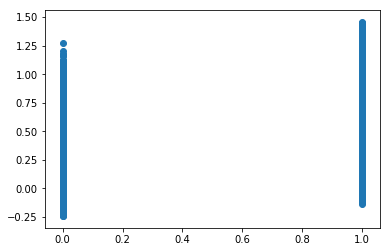

In [18]:
import matplotlib.pyplot as plt

plt.scatter(y_test, model.predict(X_test))




# GET The model to Predict



In [19]:
# Convert the date to predict

# Get the date
df1 = pd.DataFrame({'date': ['2019-02-14']},index=[1])

df1['date'] = pd.to_datetime(df1['date'])
#df1[dattime_pct =[0.05,0.10,0.15,0.20,0.25,0.30,0.40,0.50,0.80,0.90]
df1['time_pct'] =['0.40']
# # Use function to convert the date to X to get Y

L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter','is_month_start','is_month_end','is_quarter_start']
df1 = df1.join(pd.concat((getattr(df1['date'].dt, i).rename(i) for i in L), axis=1))

def k(x):
    if x['Holiday']:
        return us_holidays.get(x['date'])
    else:
        return "NoHoliday"
    
    
df1

,date,time_pct,year,month,day,dayofweek,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start
1,2019-02-14,0.40,2019,2,14,3,45,7,1,False,False,False


In [20]:
    
dr = pd.date_range(start='2011-01-01', end='2050-12-31')
cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())
df1['Holiday'] = df1['date'].isin(holidays)
data1=df1[[ 'time_pct', 'month','day','dayofweek','weekofyear','quarter','is_month_start','is_month_end','is_quarter_start','Holiday']]


#df1['holidaynames'] = df1.apply(lambda row: k(row),axis=1)

In [21]:
data1.head()

,time_pct,month,day,dayofweek,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,Holiday
1,0.40,2,14,3,7,1,False,False,False,False


In [22]:


data2 = data1.copy()
data2_binary_encoded = pd.get_dummies(data2)

data2_binary_encoded = xscale.transform(data2_binary_encoded)
data2_binary_encoded

array([[ 8.71397008,  2.08801796, -1.44956614,  2.01246598, -1.77641377,
        -2.3281146 , -0.18260221, -0.18657458, -0.10078722,  5.86402667]])

In [23]:
class_prob=model.predict(data2_binary_encoded)
class_prob
df2 = pd.DataFrame(class_prob)
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.015017,-0.000711,-0.000084,0.000001,-0.000371,2.718167,0.000055,-0.000007,-0.515553,0.000016,0.000025,-0.408568,0.000003,-0.408082,-0.248726,-0.01257,-0.082948,-0.066951,0.029747,-0.018143


In [33]:
class_labels = df2.idxmax(axis=1)
print(df2.idxmax(axis=1)[0])

5


In [35]:
bins1= [0,1,2,3,4,5,6,8,10,12,14,15,18,20,25,30,35,40,45,60,90]
waittime=bins1[df2.idxmax(axis=1)[0]]
waittime

5

In [ ]:
waittime